### ARABA FIYATI TAHMIN EDEN MODEL
Kaggle'da mevcut olan dataseti kullandım.
Verilen bilgilere göre arabaların fiyatını tahmin eden regression modeli yapacağız

In [1]:
import pandas as pd
df=pd.read_csv('/kaggle/input/autoam-car-price-prediction/train.csv')

### EDA
veri setini inceliyoruz

In [2]:
df.head()

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000


In [3]:
df.shape

(1642, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1642 non-null   object 
 1   year          1642 non-null   int64  
 2   motor_type    1642 non-null   object 
 3   running       1642 non-null   object 
 4   wheel         1642 non-null   object 
 5   color         1642 non-null   object 
 6   type          1642 non-null   object 
 7   status        1642 non-null   object 
 8   motor_volume  1642 non-null   float64
 9   price         1642 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 128.4+ KB


In [5]:
df.describe()

,year,motor_volume,price
count,1642.000000,1642.000000,1642.000000
mean,2014.805725,2.035018,15982.633374
std,6.587573,0.253069,7176.084647
min,1987.000000,0.200000,462.000000
25%,2013.000000,2.000000,12000.000000
50%,2017.000000,2.000000,15750.000000
75%,2019.000000,2.000000,18500.000000
max,2023.000000,4.000000,87000.000000


In [6]:
df.isnull().sum()

model           0
year            0
motor_type      0
running         0
wheel           0
color           0
type            0
status          0
motor_volume    0
price           0
dtype: int64

In [7]:
df.corr(numeric_only=True)

,year,motor_volume,price
year,1.000000,-0.067525,0.638699
motor_volume,-0.067525,1.000000,0.000885
price,0.638699,0.000885,1.000000


### FEATURE ENGINEERING
featurelarda gerekli değişiklikler yapıyoruz

In [8]:
#running sutunun km ve mil olarak iki farkli deger icerdigini gordum bu sebeple ikisini tek bir degere indirip yazilari kaldirdim
df['running'] = df['running'].str.replace(' miles', '', regex=False)
df['running'] = df['running'].str.replace(' km', '', regex=False)
df['running'] = df['running'].astype(float) * 1.60934
df['running'] = df['running'].astype(int)

In [9]:
df.head()

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,4828,left,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,212432,left,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,152887,left,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,220479,left,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,209214,left,black,sedan,good,2.0,26000


In [10]:
#aracin yasini ogrenmek icin bu yildan cikardim
df['year'] = df['year'].apply(lambda x: x - 2024 if x <= 2024 else x)

In [11]:
df['status'].value_counts()

status
excellent    1200
good          334
normal         58
crashed        29
new            21
Name: count, dtype: int64

In [12]:
#status sutunu icin encoding yaptim
df['status'] = df['status'].map({'excellent': 4, 'good': 3, 'normal': 2, 'crashed': 1, 'new': 5})

In [13]:
df['motor_type'].value_counts()

motor_type
petrol            1420
gas                165
petrol and gas      54
diesel               2
hybrid               1
Name: count, dtype: int64

### DATA VISUALIZATION

In [14]:
import seaborn as sns

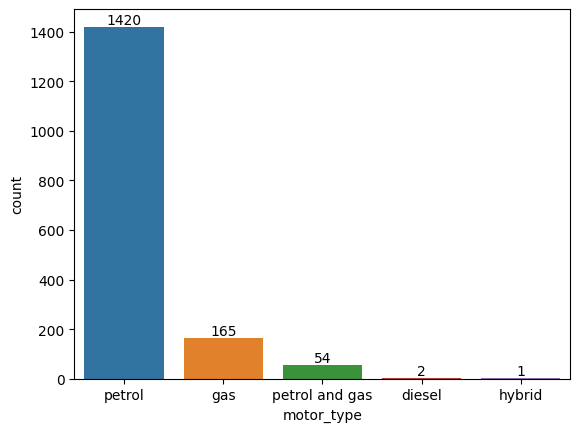

In [15]:
ax=sns.countplot(x=df['motor_type'])
ax.bar_label(ax.containers[0]);

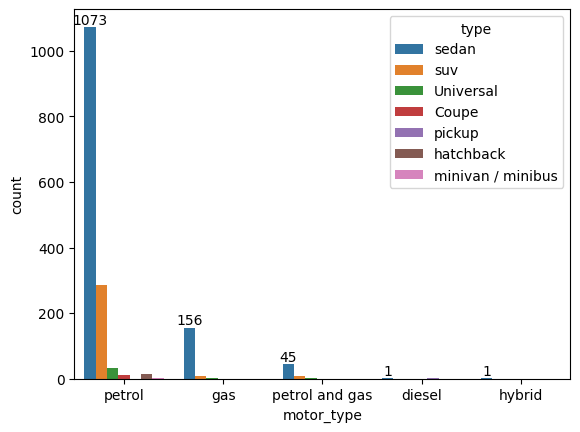

In [16]:
ax=sns.countplot(x=df['motor_type'],hue=df['type'])
ax.bar_label(ax.containers[0]);

<Axes: >

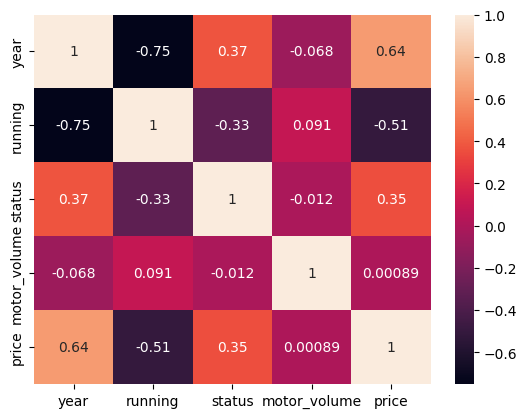

In [17]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [18]:
abs(df.corr(numeric_only=True)['price'].sort_values(ascending=False))

price           1.000000
year            0.638699
status          0.351532
motor_volume    0.000885
running         0.511554
Name: price, dtype: float64

In [19]:
#markalar gibi object degiskenler oldugu icin veri setine encoding yapiyoruz 
df = pd.get_dummies(df, drop_first=True).astype(int)

In [20]:
df.head()

,year,running,status,motor_volume,price,model_kia,model_mercedes-benz,model_nissan,model_toyota,motor_type_gas,...,color_red,color_silver,color_skyblue,color_white,type_Universal,type_hatchback,type_minivan / minibus,type_pickup,type_sedan,type_suv
0,-2,4828,4,2,24500,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,-10,212432,4,2,25500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-6,152887,4,2,11700,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-22,220479,4,3,12000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-7,209214,3,2,26000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   year                       1642 non-null   int64
 1   running                    1642 non-null   int64
 2   status                     1642 non-null   int64
 3   motor_volume               1642 non-null   int64
 4   price                      1642 non-null   int64
 5   model_kia                  1642 non-null   int64
 6   model_mercedes-benz        1642 non-null   int64
 7   model_nissan               1642 non-null   int64
 8   model_toyota               1642 non-null   int64
 9   motor_type_gas             1642 non-null   int64
 10  motor_type_hybrid          1642 non-null   int64
 11  motor_type_petrol          1642 non-null   int64
 12  motor_type_petrol and gas  1642 non-null   int64
 13  color_black                1642 non-null   int64
 14  color_blue              

In [22]:
#bu yarisma veri seti oldugu icin test dosyasina da ayni islemleri yapiyoruz.bastan iki dfyi birlestirip yapmak daha dogru olabilirdi

In [23]:
df2=pd.read_csv('/kaggle/input/autoam-car-price-prediction/test.csv')

In [24]:
df2['running'] = df2['running'].str.replace(' miles', '', regex=False)
df2['running'] = df2['running'].str.replace(' km', '', regex=False)
df2['running'] = df2['running'].astype(float) * 1.60934
df2['running'] = df2['running'].astype(int)
df2['status'] = df2['status'].map({'excellent': 4, 'good': 3, 'normal': 2, 'crashed': 1, 'new': 5})
df2['year'] = df2['year'].apply(lambda x: x - 2024 if x <= 2024 else x)

In [25]:
df2 = pd.get_dummies(df2, drop_first=True).astype(int)

In [44]:
#tahmin yaparken modeli etkilememesi icin Id sutununu cikariyoruz

In [26]:
del df2['Id']

In [27]:
# Train veri setindeki özellikleri elde edin
train_features = set(df.columns)

# Test veri setindeki eksik özellikleri belirleyin ve ekleyin
missing_features = train_features - set(df2.columns)
for feature in missing_features:
    df2[feature] = 0

# Test veri setindeki özellikleri elde edin
test_features = set(df2.columns)

# Train veri setindeki eksik özellikleri belirleyin ve ekleyin
missing_features = test_features - set(df.columns)
for feature in missing_features:
    df[feature] = 0

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   year                       411 non-null    int64
 1   running                    411 non-null    int64
 2   status                     411 non-null    int64
 3   motor_volume               411 non-null    int64
 4   model_kia                  411 non-null    int64
 5   model_mercedes-benz        411 non-null    int64
 6   model_nissan               411 non-null    int64
 7   model_toyota               411 non-null    int64
 8   motor_type_petrol          411 non-null    int64
 9   motor_type_petrol and gas  411 non-null    int64
 10  wheel_right                411 non-null    int64
 11  color_black                411 non-null    int64
 12  color_blue                 411 non-null    int64
 13  color_brown                411 non-null    int64
 14  color_cherry              

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   year                       1642 non-null   int64
 1   running                    1642 non-null   int64
 2   status                     1642 non-null   int64
 3   motor_volume               1642 non-null   int64
 4   price                      1642 non-null   int64
 5   model_kia                  1642 non-null   int64
 6   model_mercedes-benz        1642 non-null   int64
 7   model_nissan               1642 non-null   int64
 8   model_toyota               1642 non-null   int64
 9   motor_type_gas             1642 non-null   int64
 10  motor_type_hybrid          1642 non-null   int64
 11  motor_type_petrol          1642 non-null   int64
 12  motor_type_petrol and gas  1642 non-null   int64
 13  color_black                1642 non-null   int64
 14  color_blue              

### MODELLING

AUTO ML

In [30]:
!pip install pycaret

  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/3e/6f/b3d59fac3869a7685e68aecdd35c336800bce8c8d3b45687bb82cf9a2848/pycaret-3.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn>1.4.0 from https://files.pythonhosted.org/packages/8f/38/420ee614359d8f453ffe2bb5c2e963bf50459d9bbd3f5a92aa9059658955/scikit_learn-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for imbalanced-learn>=0.12.0 from https://files.pythonhosted.org/packages/6e/1b/66764ecf370e797759be06fb38c11640ea1f9456ae10f8640a33cfa726ea/imbalanced_learn-0.12.2-py3-none-any.whl.metadata
  Obtaining dependency information for kaleido>=0.2.1 from https://files.pythonhosted.org/packages/ae/b3/a0f0f4faac229b0011d8c4a7ee6da7c2dca0b6fd08039c95920846f23ca4/kaleido-0.2.1-py2.py3-none-man

In [31]:
from pycaret.regression import*

In [32]:
setup(df,target='price')

,Description,Value
0,Session id,6613
1,Target,price
2,Target type,Regression
3,Original data shape,"(1642, 36)"
4,Transformed data shape,"(1642, 36)"
5,Transformed train set shape,"(1149, 36)"
6,Transformed test set shape,"(493, 36)"
7,Numeric features,35
8,Preprocess,True
9,Imputation type,simple


In [33]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,2124.0240,15431162.4540,3770.6902,0.7064,0.2280,0.1866,1.4360
lightgbm,Light Gradient Boosting Machine,2303.1115,16054274.2665,3865.3497,0.7006,0.2384,0.2024,0.2620
rf,Random Forest Regressor,2193.2218,16125836.1244,3869.4277,0.6851,0.2295,0.1861,0.2580
et,Extra Trees Regressor,2338.6643,17080826.3625,3982.8841,0.6688,0.2346,0.1895,0.2260
gbr,Gradient Boosting Regressor,2152.2173,16410371.2026,3877.4019,0.6664,0.2269,0.1876,0.0920
ridge,Ridge Regression,2711.1686,19660414.0656,4320.7616,0.6288,0.3712,0.2337,0.0230
llar,Lasso Least Angle Regression,2719.2837,19681464.8265,4325.1047,0.6274,0.3893,0.2363,0.0240
lasso,Lasso Regression,2719.6463,19683766.9749,4325.3880,0.6273,0.3893,0.2363,0.0260
lr,Linear Regression,2742.5907,19973421.8037,4361.8185,0.6202,0.3808,0.2394,0.5170
omp,Orthogonal Matching Pursuit,3158.7618,22073168.3582,4593.1535,0.5844,0.4172,0.2628,0.0220


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [35]:
X = df.drop('price', axis=1)  # Bağımsız değişkenler (özellikler)
y = df['price']  # Bağımlı değişken (hedef değişken)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [38]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [39]:
import numpy as np
# RMSE hesaplama
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print("RMSE:", rmse)

# RSE hesaplama
rse = np.sqrt(np.mean(((y_test - y_pred) / y_test) ** 2))
print("RSE:", rse)

RMSE: 3538.4326046878564
RSE: 2.6538148426090893


In [40]:
import pickle

# Modeli kaydetme
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [41]:
df2.head()

,year,running,status,motor_volume,model_kia,model_mercedes-benz,model_nissan,model_toyota,motor_type_petrol,motor_type_petrol and gas,...,type_sedan,type_suv,type_pickup,motor_type_hybrid,price,motor_type_gas,type_minivan / minibus,color_purple,color_golden,color_pink
0,-4,38624,4,2,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,-7,136793,4,2,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,-3,48280,4,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,-6,85295,4,2,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,-21,370148,2,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   year                       411 non-null    int64
 1   running                    411 non-null    int64
 2   status                     411 non-null    int64
 3   motor_volume               411 non-null    int64
 4   model_kia                  411 non-null    int64
 5   model_mercedes-benz        411 non-null    int64
 6   model_nissan               411 non-null    int64
 7   model_toyota               411 non-null    int64
 8   motor_type_petrol          411 non-null    int64
 9   motor_type_petrol and gas  411 non-null    int64
 10  wheel_right                411 non-null    int64
 11  color_black                411 non-null    int64
 12  color_blue                 411 non-null    int64
 13  color_brown                411 non-null    int64
 14  color_cherry              

In [43]:
#islemleri ayri yaptigimiz icin tekrar duzenlememiz gerekti

In [45]:
# Eğitim veri setindeki sütun isimlerini kaydedidyoruz
feature_names = df.columns.tolist()

# df sutunlari siraliyrouz
df = df[feature_names]

# df2 veri setindeki sütunları sıralayın
df2 = df2[feature_names]

In [46]:
del df2['price']

In [47]:
X_test = df2  # Bağımsız değişkenler (özellikler)

In [48]:
import joblib
loaded_model = joblib.load('/kaggle/working/model.pkl')

In [49]:
predictions = loaded_model.predict(X_test)

In [50]:
df3=pd.read_csv('/kaggle/input/autoam-car-price-prediction/test.csv')

In [51]:
submission_df = pd.DataFrame({'Id': df3['Id'], 'price': predictions})
submission_df.to_csv('submission.csv', index=False)